In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance



In [19]:

df = pd.read_csv('The_Cancer_data_1500_V2.csv')

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
total_null= df.isnull().sum().sum()
print(f'Total missing values in the dataset: {total_null}')

Total missing values in the dataset: 0


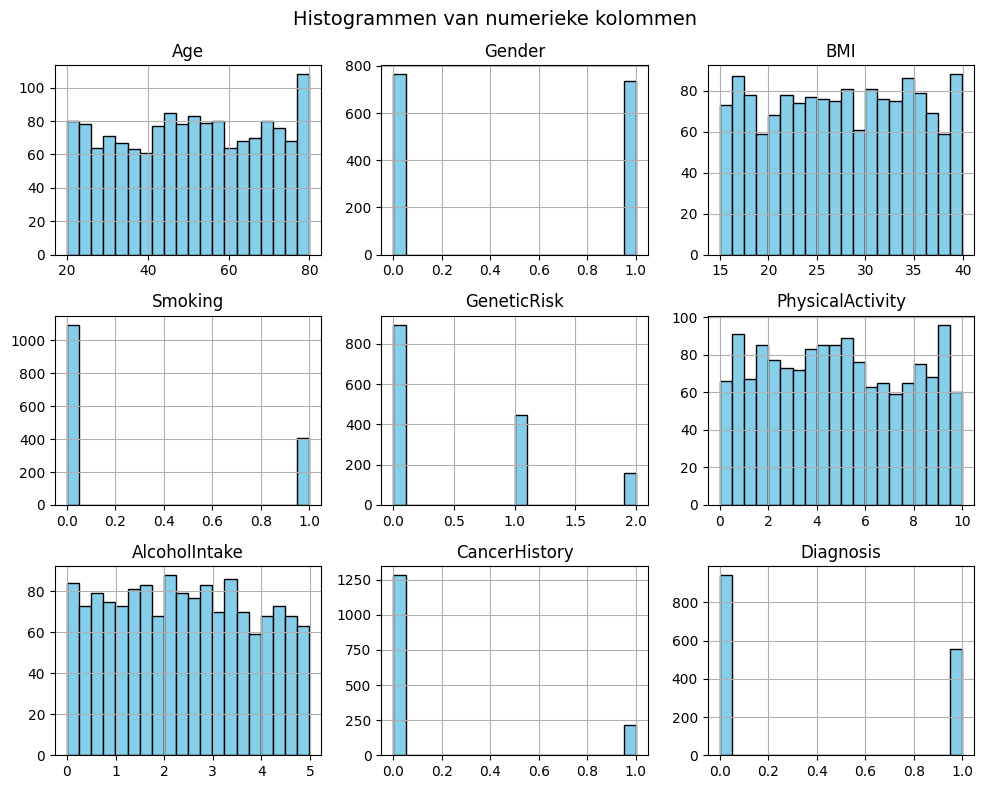

In [6]:
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogrammen van numerieke kolommen", fontsize=14)
plt.tight_layout()
plt.show()


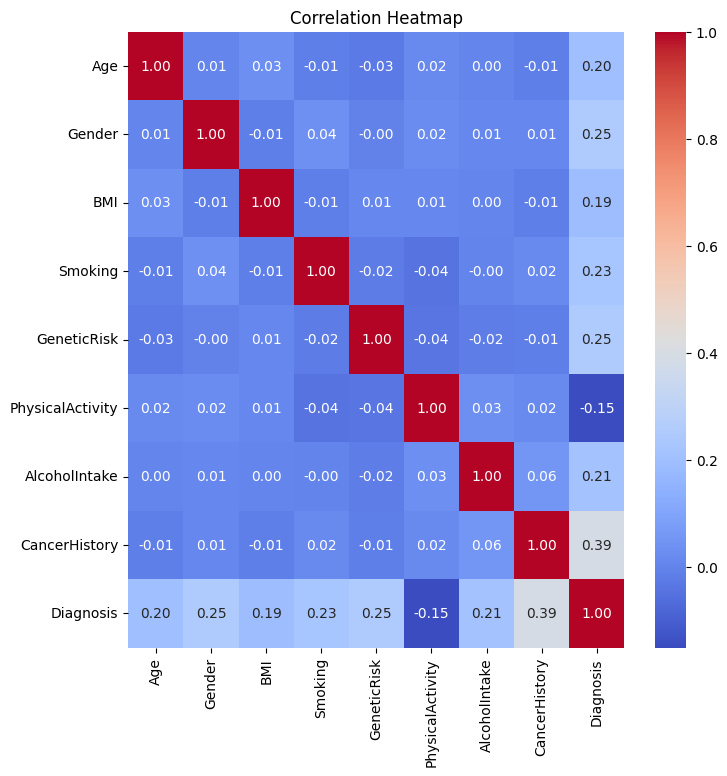

In [3]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

rf = RandomForestClassifier(n_estimators=90, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("🔹 Nauwkeurigheid (accuracy):", accuracy_score(y_test, y_pred))
print("\n🔹 Rapport:")
print(classification_report(y_test, y_pred))


🔹 Nauwkeurigheid (accuracy): 0.9133333333333333

🔹 Rapport:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       189
           1       0.93      0.83      0.88       111

    accuracy                           0.91       300
   macro avg       0.92      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



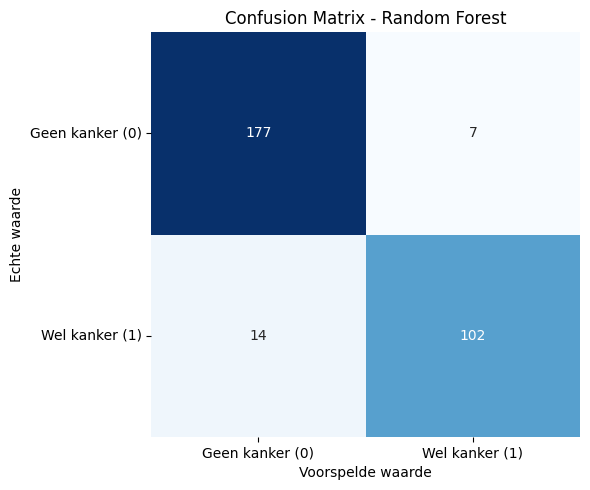

In [ ]:
print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Voorspelde waarde")
plt.ylabel("Echte waarde")
plt.xticks(ticks=[0.5, 1.5], labels=["Geen kanker (0)", "Wel kanker (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Geen kanker (0)", "Wel kanker (1)"], rotation=0)

plt.tight_layout()
plt.show()

BMI                 0.162168
AlcoholIntake       0.156228
PhysicalActivity    0.150558
CancerHistory       0.146066
Age                 0.138873
GeneticRisk         0.123074
Gender              0.068079
Smoking             0.054956
dtype: float64


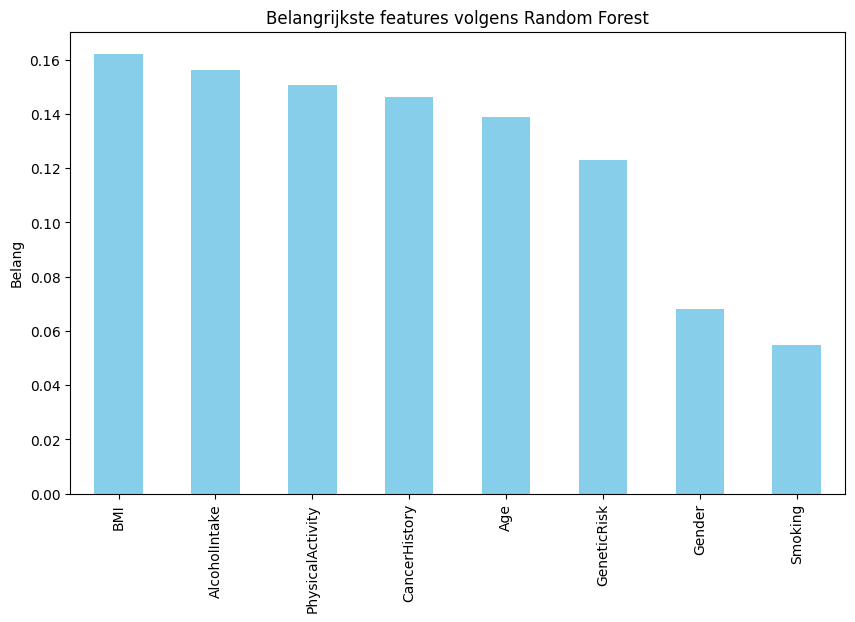

In [7]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importances.plot(kind='bar', color='skyblue')
plt.title("Belangrijkste features volgens Random Forest")
plt.ylabel("Belang")
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(
    n_estimators=200,       
    learning_rate=0.05,     
    max_depth=4,            
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 Rapport:")
print(classification_report(y_test, y_pred_xgb))

🔹 Accuracy: 0.9333333333333333

🔹 Rapport:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       184
           1       0.94      0.88      0.91       116

    accuracy                           0.93       300
   macro avg       0.94      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



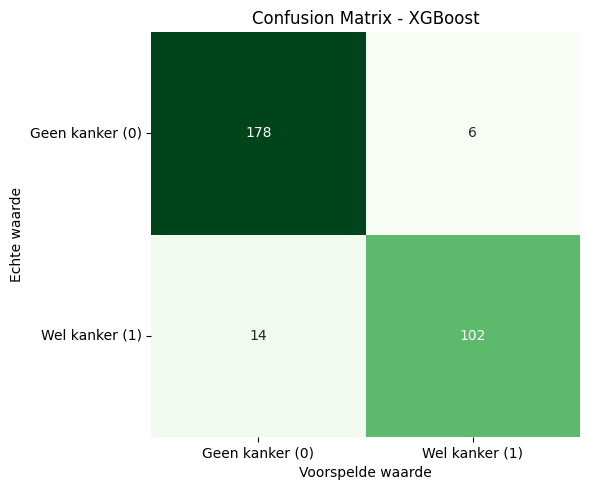

In [21]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Voorspelde waarde")
plt.ylabel("Echte waarde")
plt.xticks(ticks=[0.5, 1.5], labels=["Geen kanker (0)", "Wel kanker (1)"])
plt.yticks(ticks=[0.5, 1.5], labels=["Geen kanker (0)", "Wel kanker (1)"], rotation=0)
plt.tight_layout()
plt.show()

CancerHistory       0.258847
GeneticRisk         0.216728
Gender              0.131135
Smoking             0.119752
BMI                 0.074180
AlcoholIntake       0.070188
Age                 0.064867
PhysicalActivity    0.064302
dtype: float32


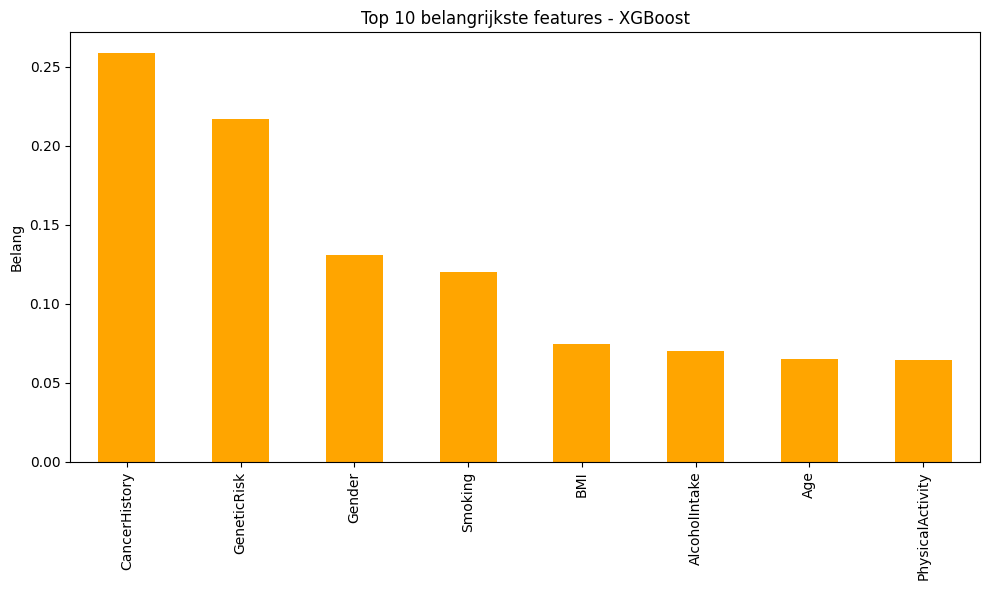

In [22]:
importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 belangrijkste features - XGBoost")
plt.ylabel("Belang")
plt.tight_layout()
plt.show()